In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('taxi_tripdata.csv')

In [3]:
#df.shape

In [4]:
#df.head()

In [5]:
#df.dtypes

In [6]:
#df.describe()

In [7]:
df = df.drop(['ehail_fee', 'VendorID', 'trip_type', 'congestion_surcharge','store_and_fwd_flag','RatecodeID','payment_type'], axis= 1)

In [8]:
#df.head()

In [9]:
df = df[df['total_amount'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]

In [10]:
#df.head()

In [11]:
#df.shape

In [12]:
for i in df.columns[[0, 1]]:
    df[i] = pd.to_datetime(df[i])

In [13]:
time_diff = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
duration = []
for x in time_diff :
    duration.append(x.total_seconds() / 60)

df['duration'] = duration
df['duration'] = df['duration'].round(2)

In [14]:
#df.isna().sum()

In [15]:
df.loc[df['passenger_count'].isna(), 'passenger_count'] = 1.0

In [16]:
df['tip_pct'] = pd.to_numeric(df['tip_amount']/df['fare_amount'])

In [17]:
df['week'] = df['lpep_pickup_datetime'].dt.day_name()

In [18]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour

<Figure size 1440x720 with 0 Axes>

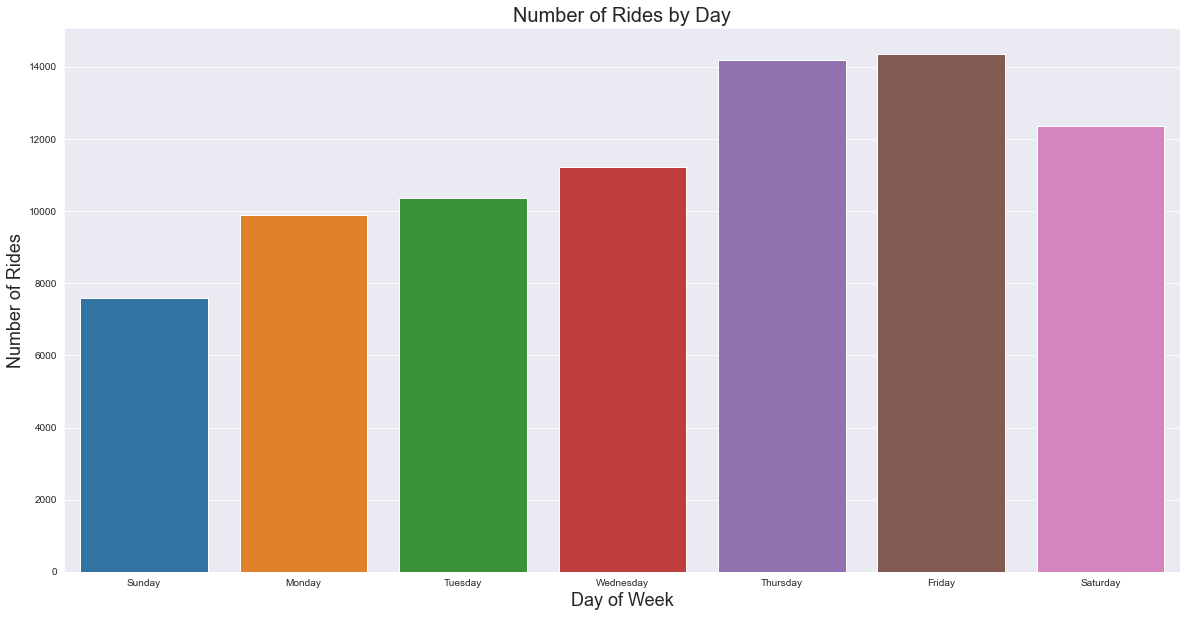

In [19]:
days= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize= (20, 10))
Day = df.groupby('week')['PULocationID'].count().reindex(days).reset_index()
#sns.countplot(y= 'week', data= df)
#plt.ylabel('Day of Week')
sns.set_style("darkgrid")

plt.figure(figsize=(20,10))
ax = sns.barplot(x="week", y="PULocationID",data=Day)

ax.set_ylabel("Number of Rides",fontsize=18)
ax.set_xlabel("Day of Week",fontsize=18)
plt.title('Number of Rides by Day', fontsize=20)

plt.savefig("Rides_Day.png",dpi=300)
plt.show()

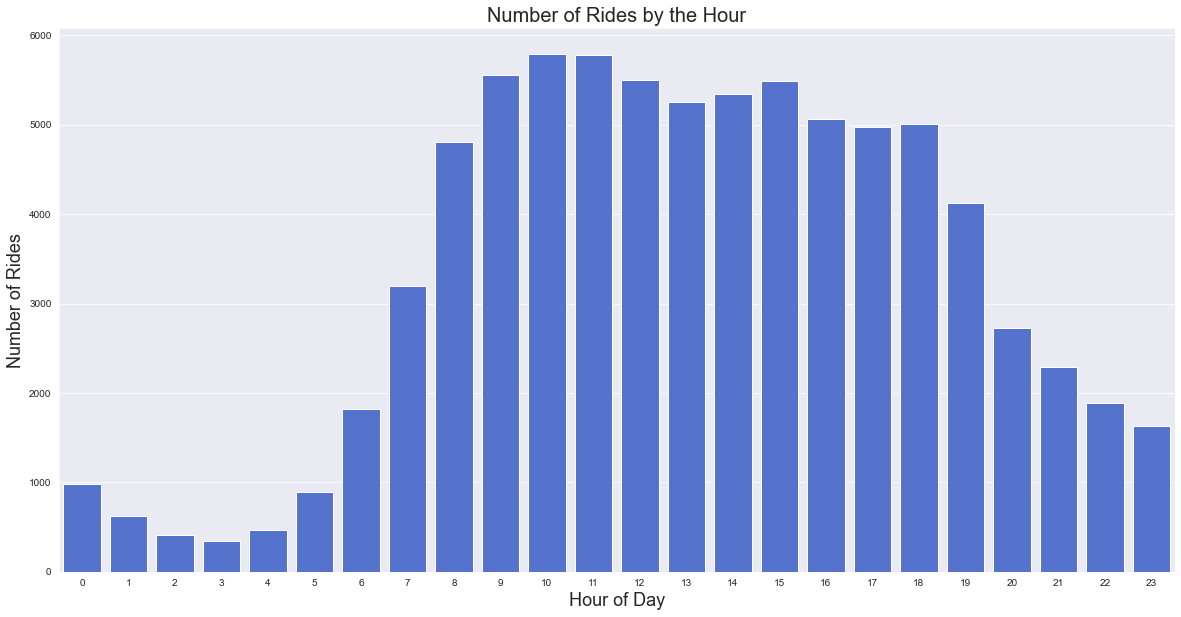

In [20]:
plt.figure(figsize= (20, 10))
ax = sns.countplot(x= 'hour', data= df,color='royalblue')

ax.set_ylabel("Number of Rides",fontsize=18)
ax.set_xlabel("Hour of Day",fontsize=18)
plt.title('Number of Rides by the Hour', fontsize=20)

plt.savefig("Rides_Hour.png",dpi=300)

plt.show()

In [21]:
tip_pct_week = df.groupby('week')['tip_pct'].mean().reindex(days).reset_index()

In [22]:
#tip_pct_week

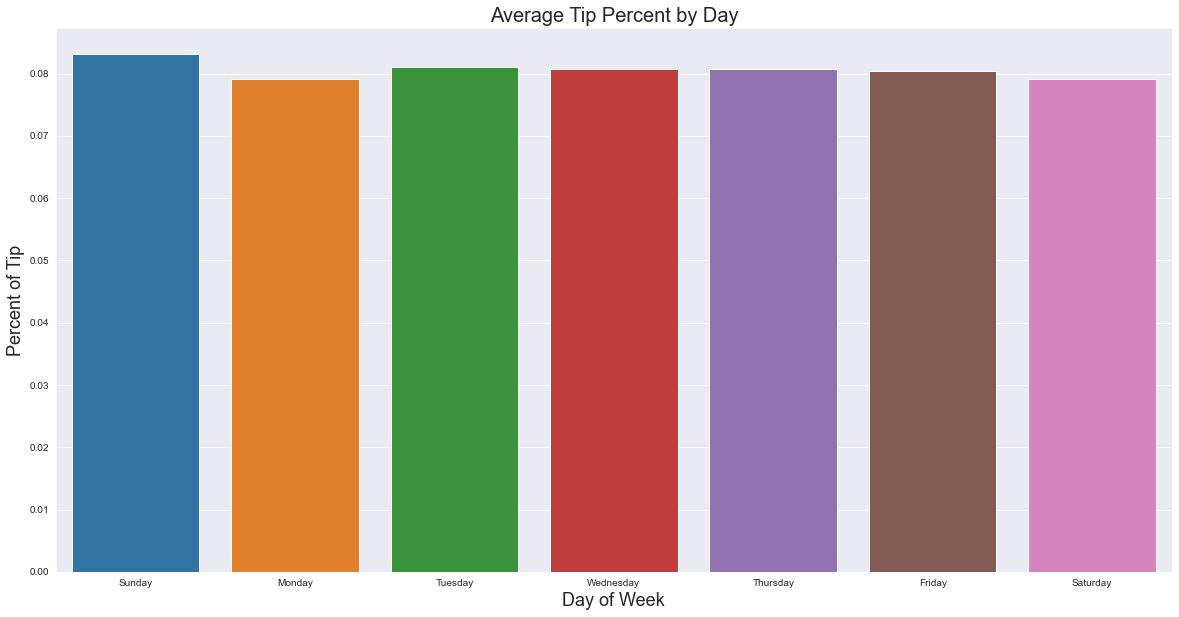

In [23]:
plt.figure(figsize= (20, 10))
ax = sns.barplot(x='week',y='tip_pct',data=tip_pct_week)

ax.set_ylabel("Percent of Tip",fontsize=18)
ax.set_xlabel("Day of Week",fontsize=18)
plt.title('Average Tip Percent by Day', fontsize=20)

plt.savefig("Tip_Day.png",dpi=300)

plt.show()

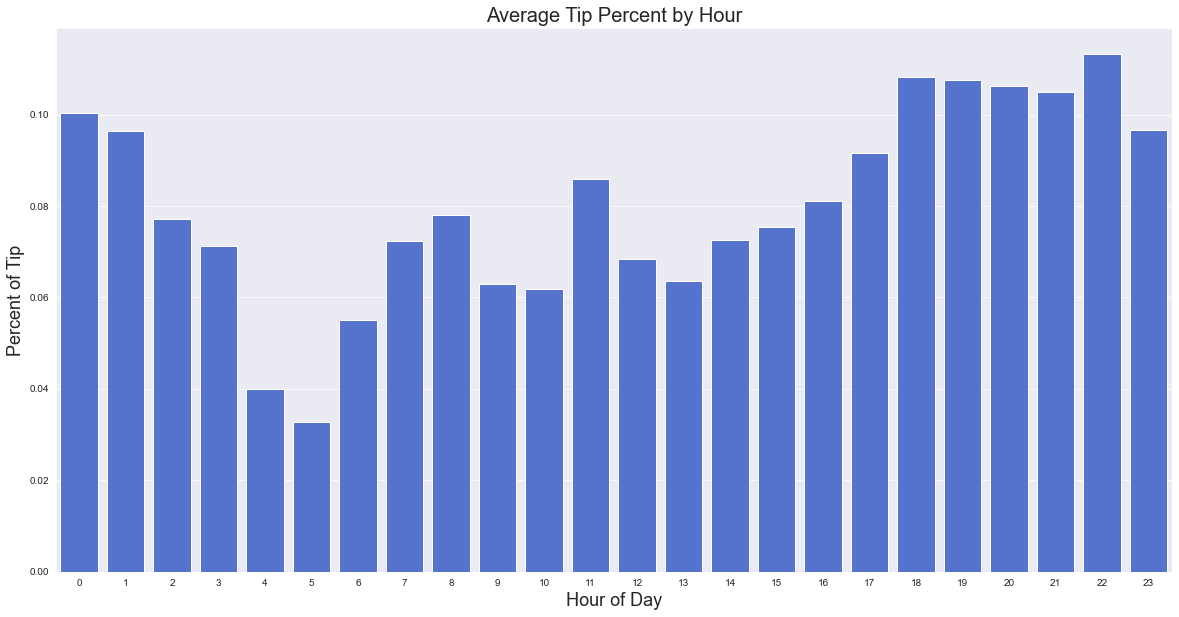

In [24]:
plt.figure(figsize= (20, 10))
tip_pct_hour = df.groupby('hour')['tip_pct'].mean().reset_index()
ax = sns.barplot(x='hour',y='tip_pct',data=tip_pct_hour,color='royalblue')

ax.set_ylabel("Percent of Tip",fontsize=18)
ax.set_xlabel("Hour of Day",fontsize=18)
plt.title('Average Tip Percent by Hour', fontsize=20)

plt.savefig("Tip_Hour.png",dpi=300)

plt.show()